In [15]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils.constants import SEASON
from utils.general import get_data_path

In [4]:
players_season_data = pd.read_csv(get_data_path(SEASON, 'players_season_data.csv'))
players_season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   player_id              781 non-null    int64  
 1   web_name               781 non-null    object 
 2   team_id                781 non-null    int64  
 3   element_type           781 non-null    int64  
 4   points_per_game        781 non-null    float64
 5   total_points           781 non-null    int64  
 6   minutes                781 non-null    int64  
 7   starts                 781 non-null    int64  
 8   goals_scored           781 non-null    int64  
 9   assists                781 non-null    int64  
 10  yellow_cards           781 non-null    int64  
 11  red_cards              781 non-null    int64  
 12  clean_sheets           781 non-null    int64  
 13  goals_conceded         781 non-null    int64  
 14  saves                  781 non-null    int64  
 15  bps   

In [30]:
def scatter_with_lr(x, y, xlabel:str, ylabel:str, c = None, alpha:float=1.0):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.scatter(
        x,
        y,
        c=c,
        alpha=alpha,
    )

    # Linear regression fit
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color='red', label='Linear Regression')

    plt.legend()
    plt.show()

In [40]:
import statsmodels.api as sm

def scatter_with_loess(x, y, xlabel:str, ylabel:str, c = None, alpha:float=1.0, frac:float=0.66):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.scatter(
        x,
        y,
        c=c,
        alpha=alpha,
    )

    # LOESS curve
    lowess = sm.nonparametric.lowess
    
    # Sort points by x for plotting the LOESS curve correctly
    sorted_indices = np.argsort(x)
    loess_fit_sorted = lowess(y[sorted_indices], x[sorted_indices], frac=frac)


    plt.plot(loess_fit_sorted[:, 0], loess_fit_sorted[:, 1], color='red', label=f'LOESS (frac={frac})')

    plt.legend()
    plt.show()


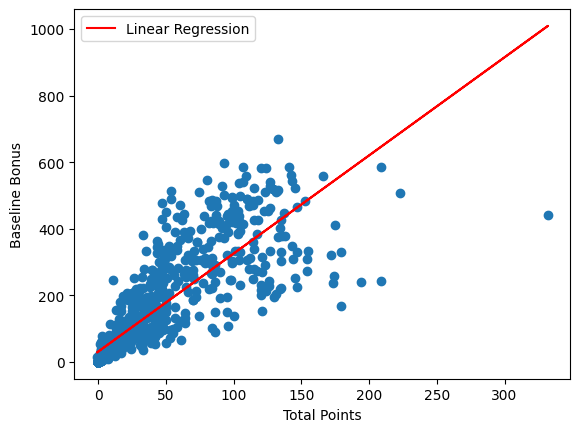

In [23]:
scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'Baseline Bonus',
)

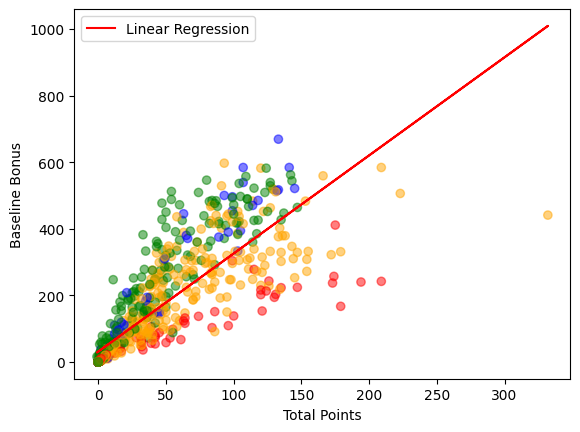

In [36]:
# Map positions to distinct colors
position_colors = {
    'Goalkeeper': 'blue',
    'Defender': 'green',
    'Midfielder': 'orange',
    'Forward': 'red'
}
colors = players_season_data['position'].map(position_colors)

scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['baseline_bps'],
    'Total Points',
    'Baseline Bonus',
    c=colors,
    alpha=0.5
)

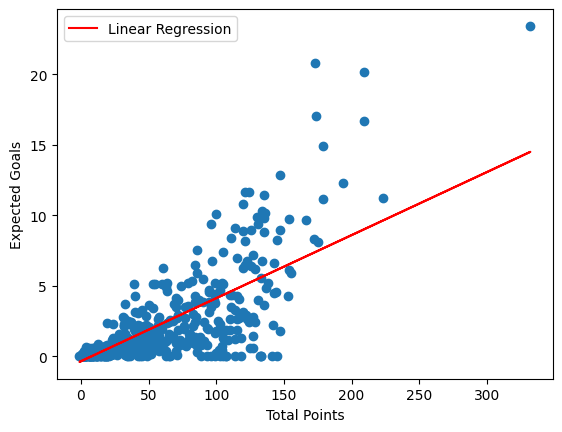

In [39]:
scatter_with_lr(
    players_season_data['total_points'],
    players_season_data['xG'],
    'Total Points',
    'Expected Goals',
)

c:\Users\kayya\Documents\FPL Predictor\.venv\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


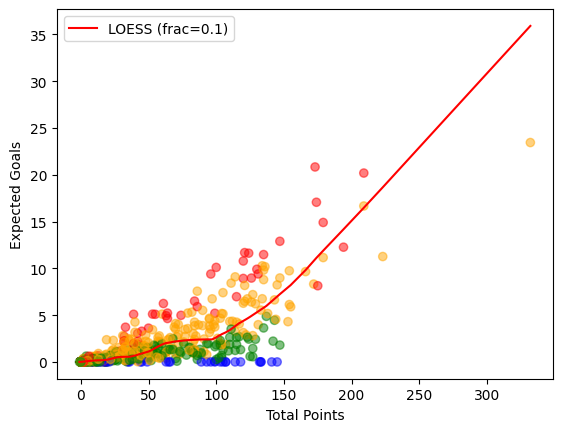

In [41]:
scatter_with_loess(
    players_season_data['total_points'],
    players_season_data['xG'],
    'Total Points',
    'Expected Goals',
    c=colors,
    alpha=0.5,
    frac=0.1
)